# Group Assignment

Group Members

1. PGCBAA02B002 Akshara Sivakumar
2. PGCBAA02B012 Badari narayan k
3. PGCBAA02B042 Nitin parihar
4. PGCBAA02B051 Rahul Bhowmick
5. PGCBAA02B062 Sayan Choudhury
6. PGCBAA02B072 Suraj Kumar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import math
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import metrics
import numpy as np
from sklearn.linear_model import Ridge

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
auto=pd.read_csv("../Data/Auto.csv",sep=',')

In [5]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino


In [6]:
auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86.0,2790,15.6,82,American,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,European,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,American,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,American,ford ranger
396,31.0,4,119.0,82.0,2720,19.4,82,American,chevy s-10


There are 397 rows and 9 columns in the dataset.

In [7]:
auto.shape

(397, 9)

There are only 392 non null records in horsepower out of 397 total number of rows.

In [8]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    object 
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [9]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Finding out if there are any missing values in the dataset

In [10]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

There are 5 missing values in horsepower. Removing the missing value from the dataset.

In [11]:
for column in ['horsepower']:
    auto[column] = pd.to_numeric(auto[column], errors = 'coerce')
auto[auto['horsepower'].isna()]
auto.dropna(axis = 0,inplace = True)

Range of numbers in each column: Check if the column values within the dataset are in the same magnitude

In [12]:
for i in auto.columns:
    print(" Range of {} min {}, max {}" .format(i, min(auto[i]), max(auto[i])))

 Range of mpg min 9.0, max 46.6
 Range of cylinders min 3, max 8
 Range of displacement min 68.0, max 455.0
 Range of horsepower min 46.0, max 230.0
 Range of weight min 1613, max 5140
 Range of acceleration min 8.0, max 24.8
 Range of year min 70, max 82
 Range of origin min American, max Japanese
 Range of name min amc ambassador brougham, max vw rabbit custom


# Univariate Analysis

Plotting a count plot to see the count of cylinder

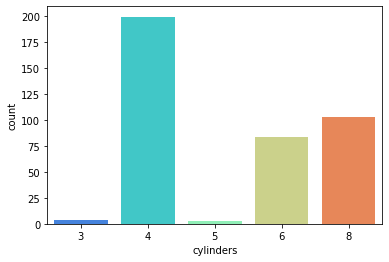

In [13]:
sns.countplot(auto.cylinders,data=auto,palette = "rainbow")
plt.show()

From the above plot we can visualize that there are maximum number of 4 cylinder vehicles. Around 98% of the vehicles are either of 4, 6, 8 cylinders and only small percent of vehicles are either of 3 and 5 cylinders.

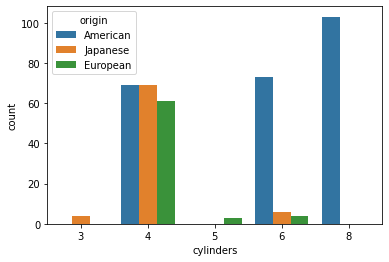

In [14]:
sns.countplot(auto.cylinders,data=auto,hue = auto.origin)
plt.show()

From the above plot, we can say that only American vehicles have more number of cylinders.

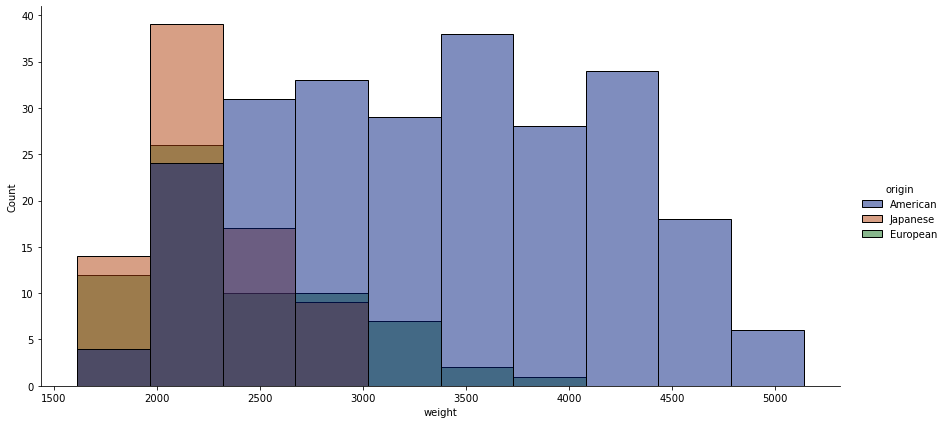

In [15]:
sns.displot(data=auto, x='weight', kind='hist',
            height=6, aspect=2,bins=10,hue = auto.origin,palette = "dark")

Japanese and European vehicles are mostly light weighted while American vehicles are heavy weighted.

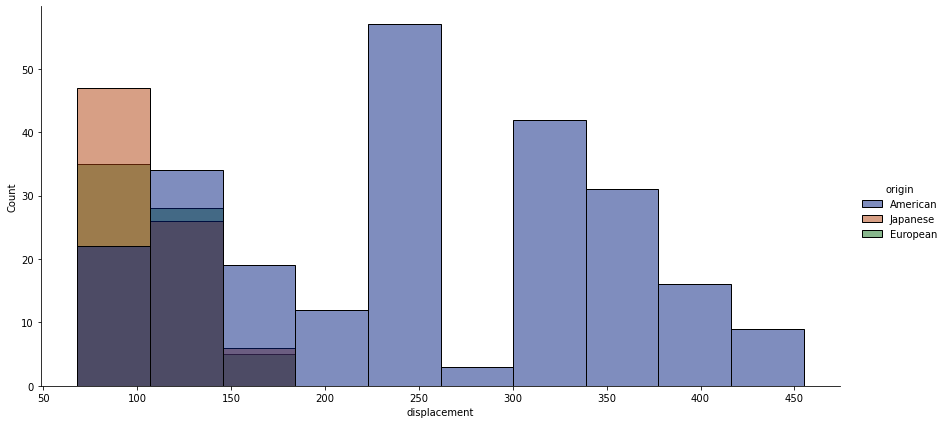

In [16]:
sns.displot(data=auto, x='displacement', kind='hist',
            height=6, aspect=2,bins=10,hue = auto.origin,palette = "dark")

Japanese and european vehicles has lower displacement while american vehicles have higher displacement.

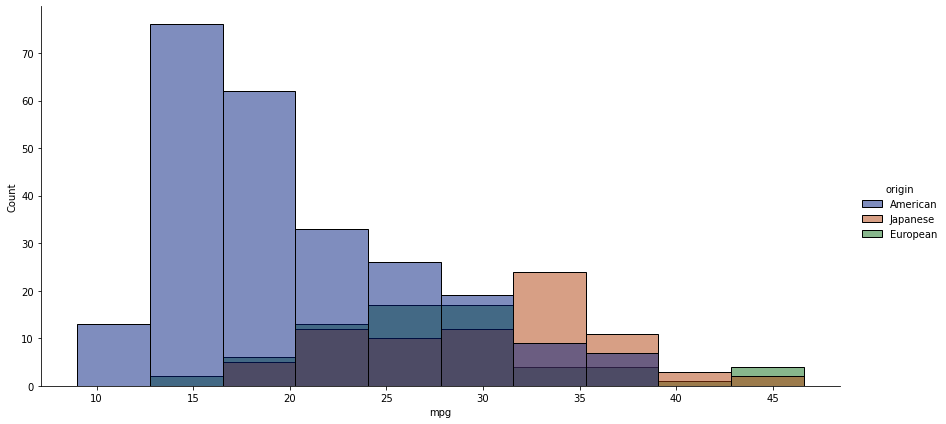

In [17]:
sns.displot(data=auto, x='mpg', kind='hist',
            height=6, aspect=2,bins=10,hue = auto.origin,palette = "dark")

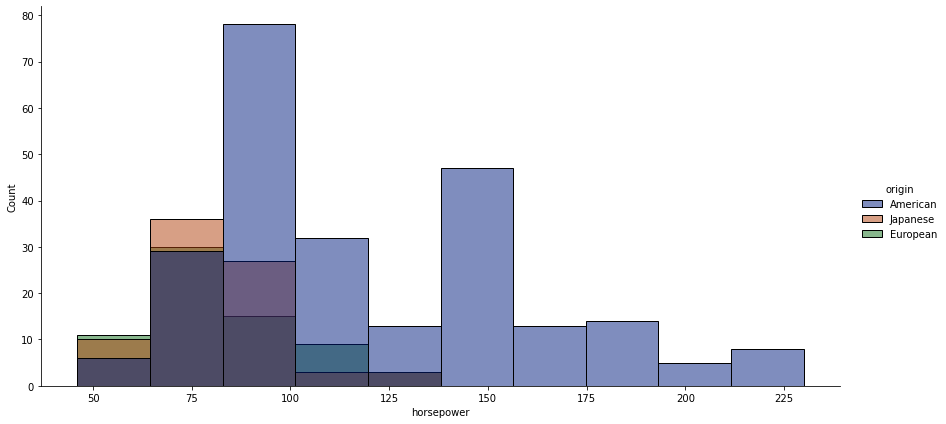

In [18]:
sns.displot(data=auto, x='horsepower', kind='hist',
            height=6, aspect=2,bins=10,hue = auto.origin,palette = "dark")

Japanese and European vehicles have lower horsepower while American vehicles have higher horsepower.

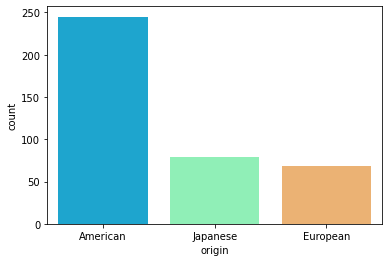

In [19]:
sns.countplot(auto.origin,palette = "rainbow")
plt.show()

Most of the vehicles are from Amaerica as compared to the other two regions. 

In [20]:
auto[auto['horsepower']>=200]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
6,14.0,8,454.0,220.0,4354,9.0,70,American,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,American,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,American,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,American,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,American,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,American,chevy c20
27,11.0,8,318.0,210.0,4382,13.5,70,American,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,American,mercury marquis
94,13.0,8,440.0,215.0,4735,11.0,73,American,chrysler new yorker brougham
95,12.0,8,455.0,225.0,4951,11.0,73,American,buick electra 225 custom


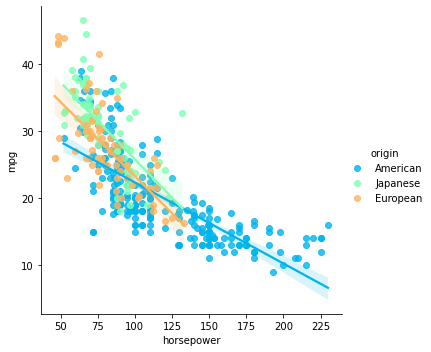

In [21]:
plot = sns.lmplot('horsepower','mpg',data=auto,hue='origin',palette = "rainbow")
plt.show()

In [22]:
auto[(auto['horsepower']>125) & (auto['mpg']>30)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
333,32.7,6,168.0,132.0,2910,11.4,80,Japanese,datsun 280-zx


There is one outlier from japan and the vehicle is datsun 280-zx.

In [23]:
auto[(auto['horsepower']<80) & (auto['mpg']>40)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
244,43.1,4,90.0,48.0,1985,21.5,78,European,volkswagen rabbit custom diesel
309,41.5,4,98.0,76.0,2144,14.7,80,European,vw rabbit
322,46.6,4,86.0,65.0,2110,17.9,80,Japanese,mazda glc
324,40.8,4,85.0,65.0,2110,19.2,80,Japanese,datsun 210
325,44.3,4,90.0,48.0,2085,21.7,80,European,vw rabbit c (diesel)
326,43.4,4,90.0,48.0,2335,23.7,80,European,vw dasher (diesel)
329,44.6,4,91.0,67.0,1850,13.8,80,Japanese,honda civic 1500 gl
393,44.0,4,97.0,52.0,2130,24.6,82,European,vw pickup


In [24]:
horsepower = auto['horsepower']
mpg = auto['mpg']
HorsepowermpgCorr = horsepower.corr(mpg)
print(HorsepowermpgCorr)

-0.7784267838977759


The above lineplot shows a negative correlation between horsepower and mpg. The above records are some of the outliers in which the increase in horsepower have increased it's mpg.

In [25]:
horsepower = auto['horsepower']
cylinder = auto['cylinders']
HorsepowerCylinderCorr = horsepower.corr(cylinder)
print(HorsepowerCylinderCorr)

0.8429833569186557


There is a strong correlation between horsepower and cylinder. each cylinder is connected to a crankshaft. The crankshaft delivers the energy created by the combustion process to the transmission and ultimately to the wheels that drive the vehicle. Generally speaking, the more cylinders an engine has the more horsepower and torque an engine makes.

In [26]:
mpg = auto['mpg']
mpgCylindersCorr = mpg.corr(cylinder)
print(mpgCylindersCorr)

-0.7776175081260216


There is a strong negative correlation between mpg and cylinder. 
As a general rule, the smaller the engine, the more efficient it's use of fuel is.

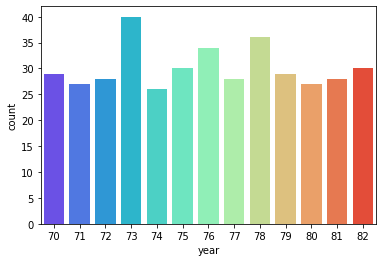

In [27]:
sns.countplot(auto['year'],palette = "rainbow")
plt.show()

Maximum number of vehicles are of the year 1973 and minumum number of the year 1974.

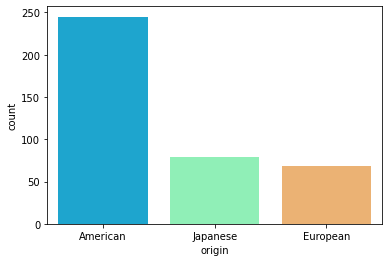

In [28]:
sns.countplot(auto.origin,palette = "rainbow")
plt.show()

America is a major manufacturer and most of the vehicles are American origin.

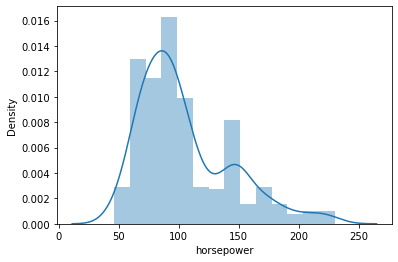

In [33]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
sns.distplot(auto['horsepower'])
plt.show()

Horsepower rates the engine performance of cars.
From the above plot we can see the distribution of the horsepower of the vehicles.
We can visualize that most of the vehicles have around 75-110 horsepower and only few vehicles have horsepoer above 200.

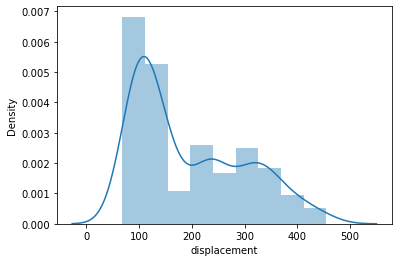

In [34]:
sns.distplot(auto.displacement,rug=False)
plt.show()

Engine displacement is the swept volume of all the pistons inside the cylinders of a reciprocating engine in a single movement from top dead centre (TDC) to bottom dead centre (BDC).

# Multivariate Analysis

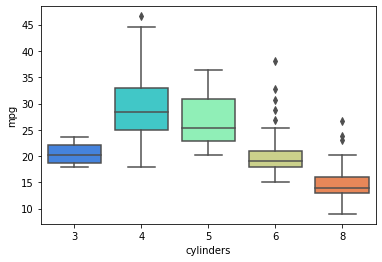

In [35]:
sns.boxplot(y='mpg',x='cylinders',data=auto,palette = "rainbow")
plt.show()

We can easily visualize that the mileage per gallon (mpg) of 4 cylinder vehicles is maximum and we also saw that most of the vehicles are 4 cylinder.
From the above result we can carry out the inference that for most of the people mileage(mpg) is one of the major factor while buying a vehicle.

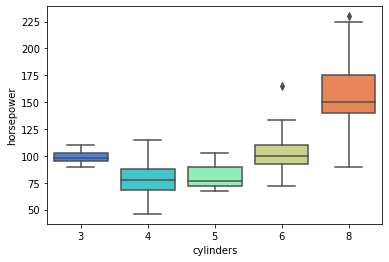

In [36]:
sns.boxplot(y='horsepower',x='cylinders',data=auto,palette = "rainbow")
plt.show()

Even number cylinder vehicles are having a better horsepower. Most of the vehicles are 4 cylindered and the horsepower of these vehicles are not very high. We can say that horsepower of vehicles are mostly considered by Americans while buying a car.

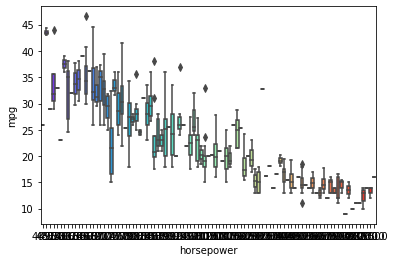

In [37]:
sns.boxplot(y='mpg',x='horsepower',data=auto,palette = "rainbow")
plt.show()

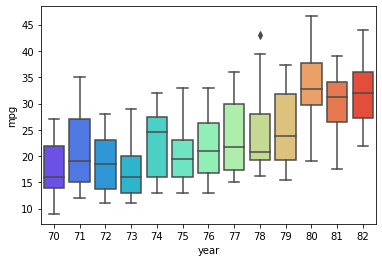

In [38]:
sns.boxplot(y='mpg',x='year',data=auto,palette = "rainbow")
plt.show()

With every year and with the newer models of the vehicles mileage per gallon (mpg) also increases.

# Regression

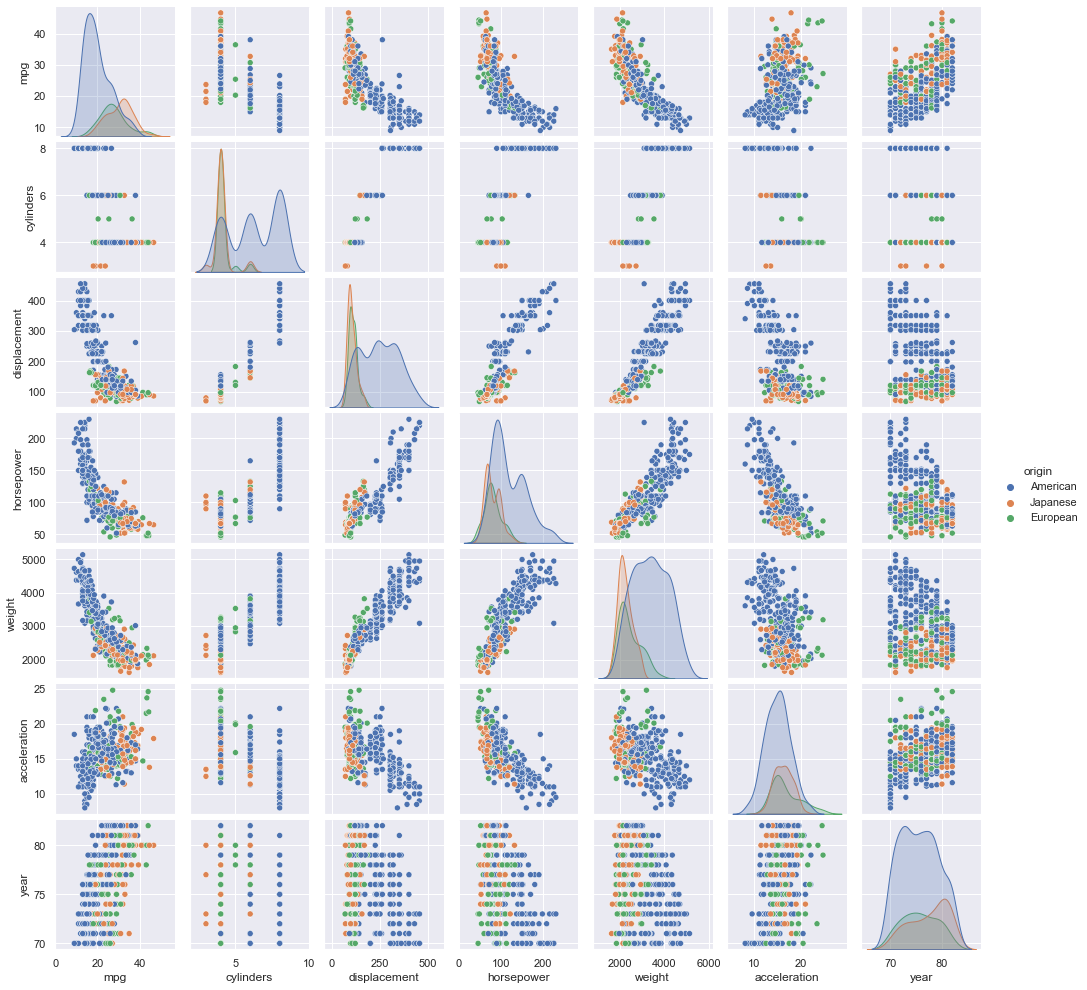

In [39]:
sns.set()
sns.pairplot(auto, size = 2.0,hue ='origin')
plt.show()

Converting the categorical variable origin into numerical variable to perform regression.

In [40]:
# creating a dict file 
origin = {'American': 1,'European': 2, 'Japanese': 3}
  
# traversing through dataframe
# Gender column and writing
# values where key matches
auto.origin = [origin[item] for item in auto.origin]
print(auto)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4         120.0        79.0    2625          18.6    82   
396  31.0          4         119.0        82.0    2720          19.4    82   

     origin                       name  
0         1  chevrolet

In [41]:
model = smf.ols(formula = 'mpg ~ horsepower + origin + weight' , data = auto)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     330.8
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          1.58e-106
Time:                        23:07:10   Log-Likelihood:                -1112.4
No. Observations:                 392   AIC:                             2233.
Df Residuals:                     388   BIC:                             2249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.2173      1.317     31.307      0.0

The above model explains 71.9% of data with 392 observations. Our Prob (F-statistic) is much smaller than alpha 0.01 and so we can reject our null hypothesis. The p statistics are very low so we can say that we have good coefficients. There is a positive relationship between origin and mpg. There is a negative relationship between horsepower and mpg and weight and mpg. More the horsepower and weight of a vehicle, lesser the mpg would be. Since the p-value of the independent variables Horsepower, Origin and Weight is very close to 0, we can be extremely confident that there is a significant linear relationship between Horsepower,weight,origin with mpg.

LINEAR EQUATION

MPG = 41.2173 + 1.3486(origin) -0.0530(horsepower) -0.0048(weight)

For every additional unit of horsepower added to the vehicle is going to bring the mpg down by 0.0530 units. For every additional unit of weight added to the vehicle is going to bring the mpg down by 0.0048 units.

Using a trial and error with the given dataset to predict a model which best describes the MPG.

In [42]:
factors = ['horsepower','weight','origin','cylinders','displacement','acceleration']
X = pd.DataFrame(auto[factors].copy())
y = auto['mpg'].copy()
#Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data 
x = StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=324)
model = LinearRegression()
model.fit(x_train, y_train)
print("The coefficients are : "+str(model.coef_))
print("The Intercept is : " +str(model.intercept_))
print("The score of this model is : " + str(model.score(x_train, y_train)))

The coefficients are : [-2.70332822 -4.385901    0.9403498  -0.89429873  1.52587273 -0.34203633]
The Intercept is : 23.33890582639786
The score of this model is : 0.683374655653799


In [43]:
predictions = model.predict(x_test)
print(predictions)

[30.98492538 14.99885674 11.76866296 28.26044592 24.2930983  16.56666627
 13.38981469 17.57970312 24.84978899 12.13360191 15.57380383 31.78399264
 29.68222208 24.81510696 24.29532759 28.02802013 13.54718133 11.02798663
 29.57671169 19.1788798  21.47957943 26.8247374  28.80731096 20.81644001
 11.47460223 25.13343786 21.93660542 16.64757963 25.64641312 23.36494809
 33.76842226 29.90239764 27.1568052  18.07977772 33.23234232 27.78740598
  7.27445721 27.40133372 30.55666583 28.61424699 23.65229695 31.8175856
 12.98847953  8.71359995 25.93939301 24.03594263 26.83380763 18.04133237
 23.52269869 32.01332713  8.63935169 18.32549062 11.63707697 29.29654531
 23.44429851 11.77333251 29.31949719 23.8714769  25.82617532 30.07756922
 31.76866599 23.38876839 23.14321452 27.88479709 29.56087886 22.42477614
 25.74418049 32.19403331 11.23459099 17.23015649 13.60391997 16.63063571
 29.55575373  9.05807588 31.9396246  14.47365154 19.90874058 33.37445198
 21.6511448  29.3626413  31.7843084  17.83732963 23.

In [44]:
print(model.score(x_train, y_train))

0.683374655653799


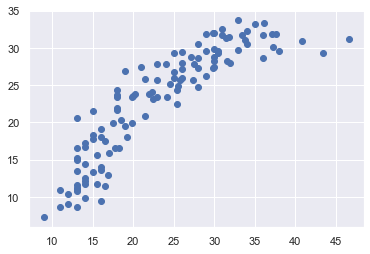

In [45]:
plt.scatter(y_test, predictions)

In [46]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

2.8409035690007083

The above model is constructed with horsepower, weight, origin, cylinder, displacement and acceleration as independent variables. The model has an absolute error of 2.82. 

Constructing another model excluding the acceleration.

In [47]:
factors1 = ['horsepower','weight','origin','cylinders','displacement']
X1 = pd.DataFrame(auto[factors1].copy())
y1 = auto['mpg'].copy()
#Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data 
x1 = StandardScaler().fit_transform(X1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3,random_state=324)
model1 = LinearRegression()
model1.fit(x_train1, y_train1)
print("The coefficients are : "+str(model1.coef_))
print("The Intercept is : " +str(model1.intercept_))
print("The score of this model is : " + str(model1.score(x_train1, y_train1)))

The coefficients are : [-2.25436093 -4.72097446  0.93220645 -0.79759169  1.51931839]
The Intercept is : 23.336239958667257
The score of this model is : 0.6826075514287556


In [48]:
predictions1 = model1.predict(x_test1)
metrics.mean_absolute_error(y_test1, predictions1)

2.838835356927063

The absolute error of the above model is slightly higher than the previous model and hence we can infer that this isn't an ideal model

Constructing another model excluding acceleration and displacement.

In [57]:
factors2 = ['horsepower','weight','origin','cylinders']
X2 = pd.DataFrame(auto[factors2].copy())
y2 = auto['mpg'].copy()
#Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data 
x2 = StandardScaler().fit_transform(X2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.3,random_state=324)
model2 = LinearRegression()
model2.fit(x_train2, y_train2)
print("The coefficients are : "+str(model2.coef_))
print("The Intercept is : " +str(model2.intercept_))
print("The score of this model is : " + str(model2.score(x_train2 ,y_train2)))

The coefficients are : [-1.85365508 -4.3423816   0.79416689 -0.0949468 ]
The Intercept is : 23.345792919261555
The score of this model is : 0.6807521509154169


In [59]:
predictions2 = model2.predict(x_test2)
metrics.mean_absolute_error(y_test2, predictions2)

2.816513095040163

The absolute error from the above module is comparitively lower compared to the other models.

Constructing another model excluding weight, acceleration and displacement

In [50]:
factors3 = ['horsepower','origin','cylinders']
X3 = pd.DataFrame(auto[factors3].copy())
y3 = auto['mpg'].copy()
#Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data 
x3 = StandardScaler().fit_transform(X3)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.3,random_state=324)
model3 = LinearRegression()
model3.fit(x_train3, y_train3)
print("The coefficients are : "+str(model3.coef_))
print("The Intercept is : " +str(model3.intercept_))
print("The score of this model is : " + str(model3.score(x_train3 ,y_train3)))

The coefficients are : [-3.4629044   1.34794622 -2.17555986]
The Intercept is : 23.394405269380957
The score of this model is : 0.6361282781107674


In [51]:
predictions3 = model3.predict(x_test3)
metrics.mean_absolute_error(y_test3, predictions3)

2.89874052673165

The absolute error of the above model is highest of all and hence cannot be considered as a good model.

Constructing another model excluding cylinder, acceleration and displacement.

In [52]:
factors4 = ['horsepower','origin','weight']
X4 = pd.DataFrame(auto[factors4].copy())
y4 = auto['mpg'].copy()
#Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data 
x4 = StandardScaler().fit_transform(X4)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size = 0.3,random_state=324)
model4 = LinearRegression()
model4.fit(x_train4, y_train4)
print("The coefficients are : "+str(model4.coef_))
print("The Intercept is : " +str(model4.intercept_))
print("The score of this model is : " + str(model4.score(x_train4 ,y_train4)))

The coefficients are : [-1.88147864  0.80307067 -4.40074411]
The Intercept is : 23.345561069610604
The score of this model is : 0.6807247817066644


In [53]:
predictions4 = model4.predict(x_test4)
metrics.mean_absolute_error(y_test4, predictions4)

2.82274528029013

Out of all the models, model2 constructed with horsepower, weight, origin and cylinder as independent variables has the lowest absolute error of 2.816. Hence,this model can be considered the best model of all.

Linear Equation

MPG = 23.35 -1.85 (horsepower) -4.34 (weight) +0.79(origin) -0.095(cylinders)
There is a negative correlation between horsepower and mpg. As the horsepower increases by 1 unit, Mpg decreases by 1.85 units. There is a negative correlation between mpg and weight. As the weight increases by 1 unit , Mpg decreases by 4.34 units.

Plotting the predicted model 2.

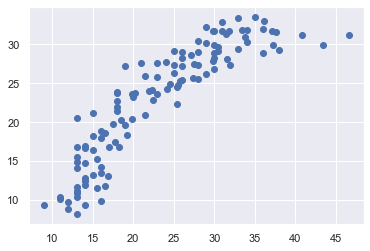

In [60]:
plt.scatter(y_test2, predictions2)

As you can see, our predicted values are very close to the actual values for the observations in the data set. A perfectly straight diagonal line in this scatterplot would indicate that our model perfectly predicted the y-array values.

Another way to visually assess the performance of our model is to plot its residuals, which are the difference between the actual y-array values and the predicted y-array values.

(array([ 5., 10., 29., 30., 26., 10.,  4.,  2.,  0.,  2.]),
 array([-8.21473664, -5.85098544, -3.48723424, -1.12348303,  1.24026817,
         3.60401938,  5.96777058,  8.33152179, 10.69527299, 13.05902419,
        15.4227754 ]),
 <BarContainer object of 10 artists>)

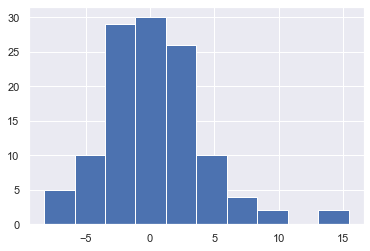

In [61]:
plt.hist(y_test2 - predictions2)

This is a histogram of the residuals from our machine learning model.

You may notice that the residuals from our machine learning model appear to be normally distributed. This is a very good sign!

It indicates that we have selected an appropriate model type to make predictions from our data set.

In [62]:
from sklearn.linear_model import Ridge
rng = np.random.RandomState(0)
rdg = Ridge(alpha = 0.5)
rdg.fit(x2, y2)
rdg.score(x2,y2)

0.7192091340999954

The output shows that the above Ridge Regression model gave the score of around 71 percent. 

# Conclusion

1. Maximum number of vehicles are manufactured with 4 cylinders. Most of the vehicles have even number of cylinders. This might be because of Balance and packaging. An engine typically wants to be in the smallest possible physical package and inherently balanced for low vibration, and for the most part even number of cylinders do that better than odd numbers in the desired configuration, albeit subject to debate. American vehciles mostly have more number of cylinders and they do not manufacture vehicles with odd number of cylinders.
2. American vehicles are predominantly of heavy weight while Japanese and European vehciles are light weighted. This might be because American vehicles use heavy caliber of displacement which is around more of high horsepower V8 Engine & have to add in safety features as well like bumpers and side impact beams.
3. Engine displacement is the measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers. And hence, American vehicles have higher displacement.
4. Horsepower and mpg are negatively correlated and hence the Japanese and European vehicles have higher mpg while American vehicles have higher horsepower.
5. 4 cylinder vehicles has the highest mpg. Hence it is observed that for most of the people mileage(mpg) is one of the major factor while buying a vehicle.
6. Our predictive model says that a vehicle's origin, weight, horsepower and number of cylinders affect the Miles Per Gallon of a vehicle.

# Recommendations

Miles Per Gallon is a key factor while buying a car. There is an increase in the demand of vehicles with higher mpg every year. However, there is still a market for vehicles with higher horsepower in the American region.